# Analyzing [Stack Overflow Annual Developer Surveys](https://insights.stackoverflow.com/survey).

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999

In [3]:
surveys = {
    "2011": {
        "data": "2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2012": {
        "data": "2012 Stack Overflow Survey Results/2012 Stack Overflow Survey Results.csv",
        "readme": None,
        "schema": None
    },
    "2013": {
        "data": "2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2014": {
        "data": "2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2015": {
        "data": "2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv",
        "readme": None,
        "schema": None
    },
    "2016": {
        "data": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv",
        "readme": "2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/READ_ME_-_The_Public_2016_Stack_Overflow_Developer_Survey_Results.txt",
        "schema": None
    },
    "2017": {
        "data": "developer_survey_2017/survey_results_public.csv",
        "readme": "developer_survey_2017/README_2017.txt",
        "schema": "developer_survey_2017/survey_results_schema.csv"
    },
    "2018": {
        "data": "developer_survey_2018/survey_results_public.csv",
        "readme": "developer_survey_2018/README_2018.txt",
        "schema": "developer_survey_2018/survey_results_schema.csv"
    },
    "2019": {
        "data": "developer_survey_2019/survey_results_public.csv",
        "readme": "developer_survey_2019/README_2019.txt",
        "schema": "developer_survey_2019/survey_results_schema.csv"
    },
    "2020": {
        "data": "developer_survey_2020/survey_results_public.csv",
        "readme": "developer_survey_2020/README_2020.txt",
        "schema": "developer_survey_2020/survey_results_schema.csv"
    }
}

In [4]:
mapping = {
    "What Country or Region do you live in?": "Country",
    "How old are you?": "Age",
    "age_midpoint": "Age",
    "How many years of IT/Programming experience do you have?": "YearsCode",
    "Which best describes the size of your company?": "OrgSize",
    "How many developers are employed at your company?": "OrgSize",
    "company_size_range": "OrgSize",
    "Which of the following best describes your occupation?": "Employment",
    "What type of project are you developing?": "DevType",
    "Including bonus, what is your annual compensation in USD?": "ConvertedComp"
}

In [6]:
def search_schema(df, string):
    """Searches schema's DataFrame columns 'Question' for the word match.
    Args:
        df (pandas.DataFrame):
        string (str):
    Returns:
        DataFrame containing labels and questions with the matched word.
    """
    if 'Question' in df.columns:
        return df[df['Question'].str.contains('\W*'+string+'\W*', case=False, regex=True)]
    return df[df['QuestionText'].str.contains('\W*'+string+'\W*', case=False, regex=True)]

def search_columns(df, string):
    """Searches DataFrame's columns for the word match.
    Args:
        df (pandas.DataFrame):
        string (str):
    Returns:
        List containing all the columns with the word match.
    """
    return df.columns[df.columns.str.contains('\W*'+string+'\W*', case=False, regex=True)].tolist()

In [5]:
survey_2011 = pd.read_csv(surveys['2011']['data'])
survey_2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,...,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,...,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


In [13]:
survey_2011.columns.tolist()

['What Country or Region do you live in?',
 'Which US State or Territory do you live in?',
 'How old are you?',
 'How many years of IT/Programming experience do you have?',
 'How would you best describe the industry you work in?',
 'Which best describes the size of your company?',
 'Which of the following best describes your occupation?',
 'How likely is it that a recommendation you make will be acted upon?',
 'What is your involvement in purchasing? You can choose more than 1.',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'What types of purchases are you involved in?',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'What type of project are you developing?',
 'Which languages are you proficient 

In [7]:
survey_2011['What Country or Region do you live in?'].value_counts()

United States of America    1037
Other Europe                 451
United Kingdom               314
Canada                       156
Australia                    112
Germany                      106
India                         95
South America                 91
Other Asia                    81
Middle East                   73
France                        60
Netherlands                   55
Africa                        43
Russia                        41
Italy                         35
Australasia                   29
Mexico                        20
North America (Other)          8
Central America                6
Response                       1
Name: What Country or Region do you live in?, dtype: int64

In [8]:
survey_2011['How many years of IT/Programming experience do you have?'].value_counts()

11          1044
41435        822
41310        717
<2           146
Response       1
Name: How many years of IT/Programming experience do you have?, dtype: int64

In [9]:
survey_2011['How would you best describe the industry you work in?'].value_counts()

Software Products          814
Web Services               495
Other                      396
Consulting                 322
Finance / Banking          189
Education                  157
Healthcare                  81
Manufacturing               77
Retail                      56
Foundation / Non-Profit     50
Gaming                      49
Advertising                 43
Response                     1
Name: How would you best describe the industry you work in?, dtype: int64

In [10]:
survey_2011['How old are you?'].value_counts()

25-29       831
30-34       612
20-24       507
35-39       343
40-50       277
< 20        116
51-60        37
>60           6
Response      1
Name: How old are you?, dtype: int64

In [12]:
survey_2011['Which best describes the size of your company?'].value_counts()

Start Up (1-25)                          745
Mature Small Business (25-100)           569
Fortune 1000 (1,000+)                    543
Mid Sized (100-999)                      447
Student                                  203
Other (not working, consultant, etc.)    139
Response                                   1
Name: Which best describes the size of your company?, dtype: int64

In [14]:
survey_2011['Which of the following best describes your occupation?'].value_counts()

Web Application Developer                1066
Desktop Application Developer             419
Server Programmer                         213
Student                                   198
Manager of Developers or Team Leader      195
Other                                     170
Embedded Application Developer            115
IT Staff / System Administrator            85
Executive (VP of Eng, CTO, CIO, etc.)      70
Systems Analyst                            54
IT Manager                                 28
Database Administrator                     23
Kernel / Driver Developer                  10
Response                                    1
Name: Which of the following best describes your occupation?, dtype: int64

In [15]:
survey_2011['Please rate your job/career satisfaction'].value_counts()

I enjoy going to work      1419
It pays the bills           585
So happy it hurts           327
I'm not happy in my job     159
FML                          63
Response                      1
Name: Please rate your job/career satisfaction, dtype: int64

In [16]:
survey_2011['Including bonus, what is your annual compensation in USD?'].value_counts()

$40,000 - $60,000       415
$60,000 - $80,000       413
$20,000 - $40,000       318
$80,000 - $100,000      292
<$20,000                283
$100,000 - $120,000     222
Student / Unemployed    215
>$140,000               110
$120,000 - $140,000      97
Response                  1
Name: Including bonus, what is your annual compensation in USD?, dtype: int64

In [17]:
survey_2011['What type of project are you developing?'].value_counts()

Web Platform    864
Enterprise      824
Other           515
SaaS            201
Mobile          194
Response          1
Name: What type of project are you developing?, dtype: int64

In [50]:
survey_2011_map = {
    "What Country or Region do you live in?",
    "How old are you?",
    "How many years of IT/Programming experience do you have?",
#     "How would you best describe the industry you work in?",
    "Which best describes the size of your company?",
    "Which of the following best describes your occupation?",
    "What type of project are you developing?",
    "Including bonus, what is your annual compensation in USD?"
}

In [26]:
survey_2011[survey_2011_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   What Country or Region do you live in?                     2814 non-null   object
 1   How old are you?                                           2730 non-null   object
 2   How many years of IT/Programming experience do you have?   2730 non-null   object
 3   How would you best describe the industry you work in?      2730 non-null   object
 4   Which best describes the size of your company?             2647 non-null   object
 5   Which of the following best describes your occupation?     2647 non-null   object
 6   What type of project are you developing?                   2599 non-null   object
 7   Including bonus, what is your annual compensation in USD?  2366 non-null   object
dtypes: object(8)
memory

In [38]:
survey_2012 = pd.read_csv(surveys['2012']['data'])
survey_2012[[col for col in survey_2012.columns if 'Unnamed' not in col]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 24 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   What Country or Region do you live in?                                                                                    6244 non-null   object
 1   Which US State or Territory do you live in?                                                                               1776 non-null   object
 2   How old are you?                                                                                                          5965 non-null   object
 3   How many years of IT/Programming experience do you have?                                                                  5965 non-null   

In [34]:
for col in survey_2011_features:
    if col not in survey_2012.columns:
        print(col)

How would you best describe the industry you work in?


In [36]:
survey_2012_features = survey_2011_features.copy()
# survey_2012_features.remove('How would you best describe the industry you work in?')
# survey_2012_features.append('How would you best describe the industry you currently work in?')

In [37]:
survey_2012[survey_2012_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   What Country or Region do you live in?                           6244 non-null   object
 1   How old are you?                                                 5965 non-null   object
 2   How many years of IT/Programming experience do you have?         5965 non-null   object
 3   Which best describes the size of your company?                   5738 non-null   object
 4   Which of the following best describes your occupation?           5738 non-null   object
 5   What type of project are you developing?                         5560 non-null   object
 6   Including bonus, what is your annual compensation in USD?        5238 non-null   object
 7   How would you best describe the industry you current

In [41]:
for k, v in surveys.items():
    current_survey = pd.read_csv(v['data'], low_memory=False)
    exploring_columns = [col for col in current_survey.columns if 'Unnamed' not in col]
    print(f"Survey: {k}", current_survey[exploring_columns].info(), "="*50, sep="\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 19 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   What Country or Region do you live in?                                                           2814 non-null   object
 1   Which US State or Territory do you live in?                                                      1030 non-null   object
 2   How old are you?                                                                                 2730 non-null   object
 3   How many years of IT/Programming experience do you have?                                         2730 non-null   object
 4   How would you best describe the industry you work in?                                            2730 non-null   object
 5   Which best de

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26087 entries, 0 to 26086
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Select all that apply    4111 non-null   object
 1   Select all that apply.1  5825 non-null   object
 2   Select all that apply.2  8913 non-null   object
 3   Select up to 3           9831 non-null   object
 4   Select up to 3.1         4509 non-null   object
 5   Select up to 3.2         9737 non-null   object
 6   Select all that apply.3  9434 non-null   object
 7   Select up to 3.3         5201 non-null   object
 8   Select all that apply.4  2152 non-null   object
 9   Select all that apply.5  11573 non-null  object
 10  Select all that apply.6  11816 non-null  object
 11  Select all that apply.7  10231 non-null  object
dtypes: object(12)
memory usage: 2.4+ MB
Survey: 2015
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [49]:
survey_2017 = pd.read_csv(surveys['2017']['data'])
survey_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
survey_2017_schema = pd.read_csv(surveys['2017']['schema'])
survey_2017_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


In [100]:
search_schema(pd.read_csv(surveys['2017']['schema']), 'age')

,Column,Question
53,AssessJobTech,"When you're assessing potential jobs to apply to, how important are each of the following to you? The languages, frameworks, and other technologies I'd be working with"
54,AssessJobProjects,"When you're assessing potential jobs to apply to, how important are each of the following to you? How projects are managed at the company or organization"
73,ImportantHiringPMExp,"Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Experience with specific project management tools & techniques"
88,HaveWorkedLanguage,"Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?"
89,WantWorkLanguage,"Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?"
103,ProjectManagement,Most project management techniques are useless
112,EquipmentSatisfiedStorage,"Thinking about your main coding workstation, how satisfied are you with each of the following? Storage capacity"
113,EquipmentSatisfiedRW,"Thinking about your main coding workstation, how satisfied are you with each of the following? Storage read/write speed"
132,StackOverflowCompanyPage,"Over the last three months, approximately how often have you done each of the following on Stack Overflow? Researched a potential employer by visiting its company page"


In [37]:
search_schema(pd.read_csv(surveys['2020']['schema']), 'salary')

,Column,QuestionText
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."


In [51]:
survey_2020_features = {
    "Country": "Country",
    "Age": "Age",
    "YearsCode": "YearsCode",
    "OrgSize": "OrgSize",
    "Employment": "Employment",
    "DevType": "DevType",
    "ConvertedComp": "ConvertedComp"
}

In [53]:
survey_2019 = pd.read_csv(surveys['2019']['data'])
survey_2019[survey_2020_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        88751 non-null  object 
 1   Age            79210 non-null  float64
 2   YearsCode      87938 non-null  object 
 3   OrgSize        71791 non-null  object 
 4   Employment     87181 non-null  object 
 5   DevType        81335 non-null  object 
 6   ConvertedComp  55823 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.7+ MB


In [ ]:
survey_2011_map = {
    "Country": "What Country or Region do you live in?",
    "Age": "How old are you?",
    "YearsCode": "How many years of IT/Programming experience do you have?",
    "OrgSize": "Which best describes the size of your company?",
    "Employment": "Which of the following best describes your occupation?",
    "DevType": "What type of project are you developing?",
    "ConvertedComp": "Including bonus, what is your annual compensation in USD?"
}

In [49]:
survey_2011_features

['What Country or Region do you live in?',
 'How old are you?',
 'How many years of IT/Programming experience do you have?',
 'How would you best describe the industry you work in?',
 'Which best describes the size of your company?',
 'Which of the following best describes your occupation?',
 'What type of project are you developing?',
 'Including bonus, what is your annual compensation in USD?']

In [28]:
survey_2020 = pd.read_csv(surveys['2020']['data'])
survey_2020['Employment'].value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [35]:
survey_2020['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [48]:
survey_2020['CompTotal'].value_counts(normalize=True, bins=10)

(-1.11111111111111e+244, 1.11111111111111e+246]    0.540249
(9.99999999999999e+246, 1.11111111111111e+247]     0.000016
(1.11111111111111e+246, 2.22222222222222e+246]     0.000000
(2.22222222222222e+246, 3.33333333333333e+246]     0.000000
(3.33333333333333e+246, 4.44444444444444e+246]     0.000000
(4.44444444444444e+246, 5.55555555555555e+246]     0.000000
(5.55555555555555e+246, 6.66666666666666e+246]     0.000000
(6.66666666666666e+246, 7.77777777777777e+246]     0.000000
(7.77777777777777e+246, 8.88888888888888e+246]     0.000000
(8.88888888888888e+246, 9.99999999999999e+246]     0.000000
Name: CompTotal, dtype: float64

In [9]:
for k, v in surveys.items():
    survey = pd.read_csv(v['data'], low_memory=True)
    print(k, "="*50, "\n")
    survey.rename(mapping, inplace=True)

2011 ================================================== 

2012 ================================================== 

2013 ================================================== 

2014 ================================================== 

2015 ================================================== 

2016 ================================================== 

2017 ================================================== 

2018 ================================================== 

2019 ================================================== 

2020 ================================================== 



In [65]:
dfs = []
for k, v in surveys.items():
    if int(k) <= 2016:
        continue
    survey = pd.read_csv(v['data'], low_memory=True)
    survey.rename(mapping, axis=1,inplace=True)
    print(k)
    dfs.append(survey[set(mapping.values())])
df = pd.concat(dfs, keys=surveys.keys())

2017


KeyError: "['Age', 'YearsCode', 'Employment', 'ConvertedComp', 'OrgSize', 'DevType'] not in index"

In [61]:
list(set(mapping.values()))

['Country',
 'Age',
 'YearsCode',
 'Employment',
 'ConvertedComp',
 'OrgSize',
 'DevType']

In [69]:
survey_2014 = pd.read_csv(surveys['2014']['data'])
survey_2015 = pd.read_csv(surveys['2015']['data'], skiprows=[0])
survey_2016 = pd.read_csv(surveys['2016']['data'])
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)
survey_2018 = pd.read_csv(surveys['2018']['data'], low_memory=True)

In [71]:
search_columns(survey_2017, 'old')

[]

In [99]:
search_schema(pd.read_csv(surveys['2017']['schema'], low_memory=True), ' ')

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


Looks like only a few amount of questions could be analyzed in the context of time.
I abandon the main idea and now will search for fun questions in the context of salary, gender, age, country, time.

In [69]:
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
salaries_clean = survey_2017['Salary'].dropna(axis=0)
salaries_clean = salaries_clean[salaries_clean != 0]
intervals = [i for i in range(0, 120001, 20000)] + [150000, 200000]
salaries = pd.cut(salaries_clean, intervals)

In [8]:
salaries = pd.DataFrame(salaries)
salaries.value_counts()

Salary          
(40000, 60000]      2801
(0, 20000]          2601
(20000, 40000]      2409
(60000, 80000]      1933
(80000, 100000]     1246
(100000, 120000]     932
(120000, 150000]     700
(150000, 200000]     263
dtype: int64

In [9]:
salaries.value_counts()

Salary          
(40000, 60000]      2801
(0, 20000]          2601
(20000, 40000]      2409
(60000, 80000]      1933
(80000, 100000]     1246
(100000, 120000]     932
(120000, 150000]     700
(150000, 200000]     263
dtype: int64

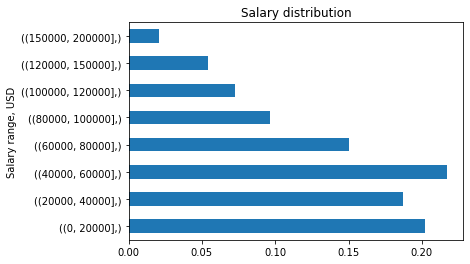

In [10]:
salaries.value_counts(normalize=True).sort_index(ascending=True).plot(kind='barh', title='Salary distribution', xlabel='Salary range, USD', ylabel='%');

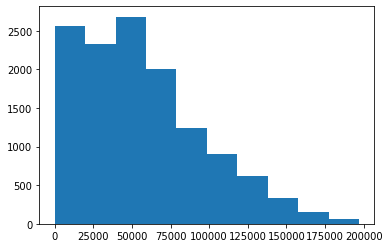

In [11]:
plt.hist(survey_2017['Salary']);

In [12]:
merged = pd.merge(survey_2017, salaries, how='inner', left_index=True, right_index=True)

In [13]:
merged['Overpaid'].value_counts()

Somewhat underpaid                5821
Neither underpaid nor overpaid    4646
Greatly underpaid                 1467
Somewhat overpaid                  830
Greatly overpaid                    89
Name: Overpaid, dtype: int64

In [14]:
intervals_adjusted = intervals[1:]
merged['Salary_x'] = merged['Salary_x'].apply(lambda x: intervals_adjusted[np.argmin(abs(np.array(intervals_adjusted) - x))])

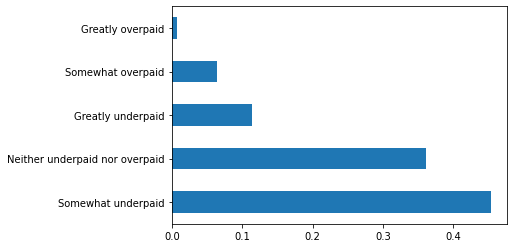

In [15]:
merged['Overpaid'].value_counts(normalize=True).plot(kind='barh');

In [16]:
sorted(merged['Salary_x'].unique())

[20000, 40000, 60000, 80000, 100000, 120000, 150000, 200000]

In [17]:
merged['Overpaid'].fillna('Unknown', inplace=True)

In [18]:
salary_overpaid_2017 = merged[['Salary_x', 'Overpaid', 'Respondent']].groupby(['Salary_x', 'Overpaid']).count()
salary_overpaid_2017.fillna('NA', inplace=True)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

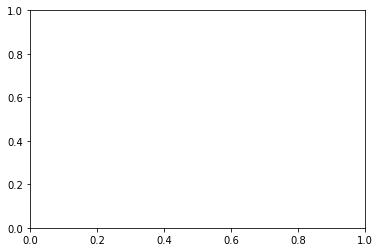

In [19]:
bottom = len(intervals_adjusted) * [0]
overpaid_list = [
    'Unknown', 
    'Greatly underpaid', 
    'Somewhat underpaid', 
    'Neither underpaid nor overpaid', 
    'Somewhat overpaid', 
    'Greatly overpaid'
]
idx = pd.IndexSlice
# c=0
colors = ['r', 'green', 'b', 'y', 'gray', 'brown']
for overpaid in overpaid_list:
    plt.bar(intervals_adjusted, salary_overpaid_2017.loc[idx[:, overpaid], :].values.reshape(1,-1), width=10000, bottom=bottom)
    bottom = salary_overpaid_2017.loc[idx[:, overpaid], :].values.reshape(1,-1)
#     bottom = len(intervals_adjusted) * [c]
#     plt.bar(intervals_adjusted, len(intervals_adjusted) * [c], width=10000, bottom=bottom, color=colors[(c-5)//5])
#     c+= 5
# plt.show()

In [20]:
salary_overpaid_2017.loc[idx[:, overpaid], :]

,,Respondent
Salary_x,Overpaid,
20000,Unknown,21
40000,Unknown,3
60000,Unknown,3
80000,Unknown,2
100000,Unknown,1
120000,Unknown,1
200000,Unknown,1


In [22]:
np.std(intervals_adjusted)

55663.6101955308

In [23]:
idx = pd.IndexSlice
salary_overpaid_2017.loc[idx[:,'Somewhat underpaid'], :]

,,Respondent
Salary_x,Overpaid,
20000,Somewhat underpaid,1661
40000,Somewhat underpaid,1376
60000,Somewhat underpaid,1168
80000,Somewhat underpaid,697
100000,Somewhat underpaid,440
120000,Somewhat underpaid,286
150000,Somewhat underpaid,174
200000,Somewhat underpaid,19


In [24]:
len(intervals_adjusted) * [0] + salary_overpaid_2017.loc[(slice(None), slice('Greatly underpaid')), :].values.reshape(1,-1)

ValueError: operands could not be broadcast together with shapes (8,) (1,15) 

In [ ]:
merged[['Salary_x', 'Overpaid', 'Respondent']].groupby('Overpaid').count()

In [ ]:
intervals_adjusted

In [25]:
merged.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary_x,ExpectedSalary,Salary_y
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,120000,NaN,"(100000, 120000]"
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics engineering,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000,NaN,"(80000, 100000]"
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Male,A master's degree,"Native American, Pacific Islander, or Indigenous Australian; White or of European descent",Disagree,Agree,Disagree,Agree,120000,NaN,"(120000, 150000]"
18,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000,NaN,"(80000, 100000]"
22,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics engineering,A few days each month,500 to 999 employees,...,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100000,NaN,"(100000, 120000]"


In [180]:
survey_2017 = pd.read_csv(surveys['2017']['data'], low_memory=True)
survey_2017.shape

(51392, 154)

In [181]:
intervals_adjusted = [i for i in range(10000, 100001, 10000)] + [i for i in range(120000, 200001, 20000)]

def process_salary(df):
    dataframe = df.copy()
    dataframe = dataframe.dropna(subset=['Salary'], axis=0)
    dataframe['Salary'] = dataframe['Salary'].apply(lambda x: intervals_adjusted[np.argmin(abs(np.array(intervals_adjusted) - x))])
    return dataframe

def process_overpaid(df):
    dataframe = df.copy()
    dataframe['Overpaid'] = dataframe['Overpaid'].fillna('Unknown')
    return dataframe

def make_dummies(df, col, prefix):
    dataframe = pd.get_dummies(df, columns=[col], prefix=prefix)
    return dataframe

survey_2017_clean = survey_2017.copy()
survey_2017_clean = process_salary(survey_2017_clean)
survey_2017_clean = process_overpaid(survey_2017_clean)
overpaid_list = ['Overpaid_'+i for i in survey_2017_clean['Overpaid'].unique()]
survey_2017_clean = make_dummies(survey_2017_clean, 'Overpaid', 'Overpaid')

In [160]:
set(survey_2017_clean.columns).difference(set(survey_2017))

{'Overpaid_Greatly overpaid',
 'Overpaid_Greatly underpaid',
 'Overpaid_Neither underpaid nor overpaid',
 'Overpaid_Somewhat overpaid',
 'Overpaid_Somewhat underpaid',
 'Overpaid_Unknown'}

In [233]:
overpaid_dict = {
    "Overpaid_Greatly underpaid": "Greatly underpaid",
    "Overpaid_Somewhat underpaid": "Somewhat underpaid",
    "Overpaid_Neither underpaid nor overpaid": "Neither",
    "Overpaid_Somewhat overpaid": "Somewhat overpaid",
    "Overpaid_Greatly overpaid": "Greatly overpaid",
    "Overpaid_Unknown": "Not sure"
}

In [182]:
salary_overpaid_2017 = survey_2017_clean[['Salary']+overpaid_list].groupby(by='Salary').sum()
salary_overpaid_2017

,Overpaid_Neither underpaid nor overpaid,Overpaid_Somewhat underpaid,Overpaid_Somewhat overpaid,Overpaid_Greatly underpaid,Overpaid_Unknown,Overpaid_Greatly overpaid
Salary,,,,,,
10000,603.0,928.0,86.0,457.0,17.0,21.0
20000,295.0,466.0,43.0,156.0,1.0,10.0
30000,356.0,590.0,71.0,193.0,4.0,5.0
40000,481.0,678.0,66.0,163.0,1.0,8.0
50000,534.0,721.0,62.0,164.0,2.0,7.0
60000,474.0,592.0,88.0,121.0,2.0,4.0
70000,334.0,435.0,57.0,68.0,1.0,1.0
80000,285.0,334.0,43.0,44.0,1.0,7.0
90000,265.0,271.0,55.0,31.0,1.0,3.0


In [230]:
def convert_xticks(arr):
    result = map(lambda x: str(x//1000)+'k', arr)
    return list(result)

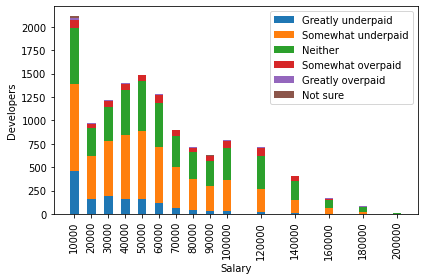

In [256]:
bottom = len(intervals_adjusted) * [0]

# colors = ['r', 'pink', 'b', 'orange', 'brown', 'gray']
for i, overpaid in enumerate(overpaid_dict):
    plt.bar(intervals_adjusted, salary_overpaid_2017[overpaid].values, width=5000, bottom=bottom, align='center')
    bottom += salary_overpaid_2017[overpaid].values
    
plt.legend(overpaid_dict.values())
plt.xlabel('Salary')
plt.ylabel('Developers')
plt.xticks(intervals_adjusted, rotation=90)
plt.tight_layout()
plt.show()

In [264]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_hel